#### Задание 1
Импортируйте библиотеки `pandas`, `numpy` и `matplotlib`.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки `sklearn`.

Создайте датафреймы `X` и `y` из этих данных.

Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.

Масштабируйте данные с помощью `StandardScaler`.

Постройте модель TSNE на тренировочный данных с параметрами:  
`n_components=2, learning_rate=250, random_state=42`.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

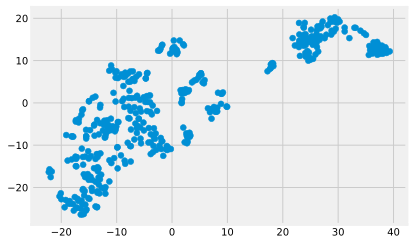

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма `X_train`.  
Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения "price" и "CRIM" в разных кластерах.

In [7]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [8]:
train_labels = km_model.fit_predict(X_train_scaled)

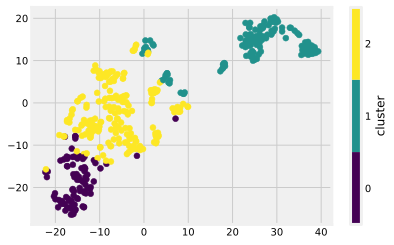

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels,
            cmap=plt.cm.get_cmap(lut=3))
plt.colorbar(ticks=range(3), label='cluster')
plt.clim(-0.5, 2.5)
plt.show()

In [10]:
mean_prices_train = [y_train[train_labels == cluster].mean() for cluster in [0, 1, 2]]
mean_crim_train = [X_train.loc[train_labels == cluster, 'CRIM'].mean() for cluster in [0, 1, 2]]
pd.DataFrame([mean_prices_train, mean_crim_train],
             index=['mean_price', 'mean_CRIM'],
             columns=['cluster_0', 'cluster_1', 'cluster_2'])

,cluster_0,cluster_1,cluster_2
mean_price,27.788372,16.165354,24.958115
mean_CRIM,0.073566,10.797028,0.421660


#### \*Задание 3
Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения "price" и "CRIM" в разных кластерах на тестовых данных.

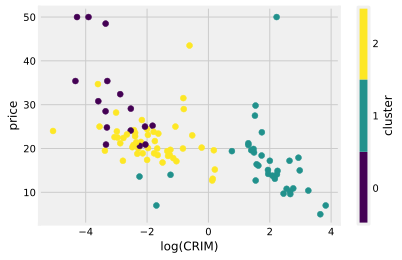

In [11]:
test_labels = km_model.predict(X_test_scaled)

plt.scatter(np.log(X_test.loc[:, 'CRIM']), y_test, c=test_labels,
            cmap=plt.cm.get_cmap(lut=3))
plt.colorbar(ticks=range(3), label='cluster')
plt.clim(-0.5, 2.5)
plt.xlabel('log(CRIM)')
plt.ylabel('price')
plt.show()

In [12]:
mean_prices_test = [y_test[test_labels == cluster].mean() for cluster in [0, 1, 2]]
mean_crim_test = [X_test.loc[test_labels == cluster, 'CRIM'].mean() for cluster in [0, 1, 2]]
pd.DataFrame([mean_prices_test, mean_crim_test],
             index=['mean_price', 'mean_CRIM'],
             columns=['cluster_0', 'cluster_1', 'cluster_2'])

,cluster_0,cluster_1,cluster_2
mean_price,31.35000,16.437143,21.860784
mean_CRIM,0.06206,10.165531,0.266079
